**Les tris**

Ceci est un corrigé détaillé du chapitre "Tris" du cahier d'exercices disponible à cette adresse http://liris.cnrs.fr/~pchampin/enseignement/algo/exercices/tris.html

On parle de tris, mais aussi de complexité algorithmique. 

Par conséquent, pour chaque algorithme, vous vous poserez les questions suivantes : combien d’étapes de calcul sont elles nécessaires :
* dans le pire des cas ?
* lorsque le tableau est déjà trié ?
* lorsque le tableau est trié dans l’ordre décroissant ?


In [1]:
%matplotlib inline

[33, 49, 63, 73, 77, 87, 97, 109, 115, 144]
[33, 49, 63, 73, 77, 87, 97, 109, 115, 144]
[33, 49, 63, 73, 77, 87, 97, 109, 115, 144]
[33, 49, 63, 73, 77, 87, 97, 109, 115, 144]
[10, 100, 500, 1000]
[3.900000000101045e-05, 0.00035799999999852616, 0.008582999999994456, 0.03501800000000088]
[2.300000000587943e-05, 0.0007060000000009836, 0.01691900000000146, 0.07442499999999797]
[1.6000000002236447e-05, 0.00013000000000573664, 0.0007659999999987122, 0.0019470000000012533]
[1.4000000000180535e-05, 0.0011170000000007008, 0.026651999999998566, 0.10879899999999765]


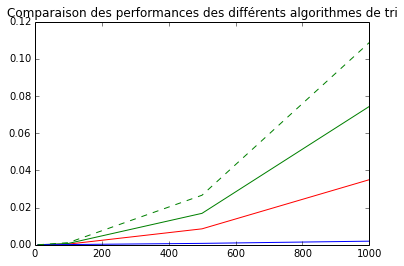

In [6]:
# Comparaison des différents tris
import time
import random
import matplotlib.pyplot as plt
import numpy as np

# On commence par définir une petite méthode "utilitaire" qui va nous servir souvent.
# permute permet de permuter deux éléments situés aux indices i et j d'un tableau.
def permute(tab, i, j):
    '''
    :e/s: tab, un tableau d'éléments
    :entrees i et j: (int) les indices des éléments à permuter
    :pre-cond: i et j sont des indices valides dans tab
    :post-cond: le tableau est modifié, deux valeurs sont perumtées
    '''
    temp = tab[i]
    tab[i] = tab[j]
    tab[j] = temp

# Tri par sélection
# Rappel : on recherche le minimum du tableau, et on le permute avec l'élément dans la première case.
#          Ensuite, on recherche le minimum dans le reste du tableau, et on le permute avec l'élément dans la 2ème case.
#          Et ainsi de suite...


def triSelection(tab):
    '''
    :e/s tab: tableau (de float)
    :post-cond:
       - ∀ i ∈ [0;len(tab)[, ∃ j ∈ [0;len(tab)[,  tabₛ[j] = tabₑ[i]
         (les éléments de tab ont simplent changé d'ordre)
       - ∀ i ∈ [1;len(tab)[,  tabₛ[i] ≥ tabₛ[i-1]
         (les éléments de tab sont triés par valeur croissante)
    :complexité : 𝓞(n²)
    '''
    for i in range(len(tab)-1):
        indice_min = i
        
        # Boucle de recherche du minimum dans le tableau restant
        for j in range(i+1,len(tab)):
            if tab[j]<tab[indice_min]: 
                indice_min=j
        
        # Une fois le min trouvé, on le permute pour le mettre à sa place
        permute(tab, i, indice_min)
        

# Tri par insertion 
# Rappel : on considère que le "début" du tableau est trié. 
#          On se place au niveau de la première valeur non triée, et on la décale à gauche jusqu'à ce qu'elle trouve sa place
#          Observez que la partie gauche du tableau est déjà triée... 


# On commence par écrire une petite fonction utilitaire (une autre).
# Cette fonction prend un élément à un indice i, et le décale sur 
#   sa gauche jusqu'à ce qu'il soit à sa place... en faisant 
#   l'hypothèse que tous les éléments sur sa gauche sont bien triés.

def insereElt(tab, i):
    '''
    :e/s tab: tableau d'éléments
    :entrée i: int
    :pré-cond:
       - 1 ≤ i < len(tab)
       - ∀ j ∈ [1;i[,  tab[j] ≥ tab[j-1]  (tab est trié entre 0 et i-1)
    :post-cond:
       - ∀ j ∈ [0;i+1[, ∃ k ∈ [0;i+1[,  tabₛ[k] = tabₑ[j]
         (les éléments entre 0 et i+1 ont simplement changé d'ordre)
       - ∀ j ∈ [i+1;len(tab)[,  tabₛ[j] = tabₑ[j]
         (les éléments au delà de i n'ont pas été modifiés)
       - ∀ j ∈ [1;i+1[,  tab[j] ≥ tab[j-1]
         (tab est trié entre 0 et i)
    '''
    while (tab[i-1] > tab[i]) and i>0 :
        permute(tab, i, i-1)
        i -= 1   

# On écrit ensuite l'algo principal qui consiste à prendre
#  tour à tour chaque élément "non trié", et à l'insérer dans
#  le tableau trié (c'est-à-dire à le décaler jusqu'à sa bonne
#  place sur sa gauche). 
def triInsertion(tab):
    '''
    :e/s tab: tableau d'éléments
    :pré- et post-conditions usuelles
    '''
    for i in range(1,len(tab)):
        insereElt(tab, i)


# Tri binaire, ou quicksort
# Le quicksort est un tri récursif par excellence. 
# Le principe est que l'on choisit une valeur pivot, 
#   on range toutes les valeurs plus petites que le pivot à gauche du pivot
#   et toutes les valeurs plus grandes à droite. 
# Ensuite, on applique la même démarche sur les sous-tableaux gauche et droite. 
# Une simulation intéressante est disponible ici : 
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html


# On définit une méthode utilitaire qui va nous aider à partitionner notre tableau autour d'un pivot
def partitionne(tab, imin, imax):
    '''
    :e/s tab: tableau d'éléments 
    :entrée imin: int
    :entrée imax: int
    :sortie idroite: int
    :pré-cond: 0 ≤ imin ≤ imax < len(tab)
    :post-cond:
       - imin ≤ idroite ≤ imax
       - ∀ i ∈ [0;imin[ U ]imax;len(tab)[, tabₛ[i] = tabₑ[i]
         (tab n'est pas modifié en dehors de la plage [imin;imax])
       - ∀ i ∈ [imin;imax], ∃ j ∈ [imin;imax],  tabₛ[j] = tabₑ[i]
         (les éléments de tab ont simplent changé d'ordre entre imin et imax)
       - ∀ i ∈ [imin;idroite], tabₛ[i] ≤ tabₛ[idroite]
         (les éléments à gauche du pivot lui sont inférieurs ou égaux)
       - ∀ i ∈ ]idroite;imax], tabₛ[i] > tabₛ[idroite]
         (les éléments à droite du pivot lui sont supérieurs)
    '''
    pivot = tab[imin] # On choisit arbitrairement le premier élément comme pivot 

    igauche = imin + 1
    idroite = imax
    fini = False
    while not fini:
        while igauche <= idroite and tab[igauche] <= pivot:
            igauche = igauche + 1
        while tab[idroite] >= pivot and idroite >= igauche:
            idroite = idroite - 1
        if idroite < igauche:
            fini= True
        else:
            temp = tab[igauche]
            tab[igauche] = tab[idroite]
            tab[idroite] = temp
            #permute(tab, igauche, idroite)
    temp = tab[imin]
    tab[imin] = tab[idroite]
    tab[idroite] = temp
    #permute(tab, imin, imax)
    return idroite


# Si notre tableau n'est pas vide, on appelle tri_rec :
# Sinon, le tableau vide n'est pas modifié. 
def triRecursif(tab):
    if len(tab) > 0:
        tri_rec(tab, 0, len(tab)-1)

def tri_rec(tab, imin, imax):
    '''
    :e/s tab: tableau d'éléments
    :entrée imin: int
    :entrée imax: int
    :pré-cond: 0 ≤ imin ≤ imax < len(tab) (les indices existent dans le tableau)
    :post-cond:
       - ∀ i ∈ [0;imin[ U ]imax;len(tab)[, tabₛ[i] = tabₑ[i]
         (tab n'est pas modifié en dehors de la plage [imin;imax])
       - ∀ i ∈ [imin;imax], ∃ j ∈ [imin;imax],  tabₛ[j] = tabₑ[i]
         (les éléments de tab ont simplent changé d'ordre entre imin et imax)
       - ∀ i ∈ [imin;imax[,  tabₛ[i+1] ≥ tabₛ[i]
         (tab est trié entre imin et imax)
    '''
    if imin < imax:
        # partition the list
        pivot = partitionne(tab, imin, imax)
        # sort both halves
        tri_rec(tab, imin, pivot-1)
        tri_rec(tab, pivot+1, imax)
    return tab

# Tri bulle 
def triBulle(tab):
    '''
    :entree/sortie: tab un tableau d'éléments
    :post-condition : tab est trié
    ''' 
    swap = True
    while swap == True:
        swap = False
        for j in range(0,len(tab)-1):
            if tab[j]>tab[j+1]:
                swap = True
                temp=tab[j]
                tab[j]=tab[j+1]
                tab[j+1]=temp




nvalues = [10, 100, 500, 1000]
timesSelection = []
timesInsertion = []
timesBulle = []
timesRecursif = []

for i in nvalues:
    random.seed()
    p = 12**2 # Ordre de grandeur des valeurs
    liste = []
    
    for x in range(i): liste.append(random.randint(0, p))

    tableau = list(liste)
    a=time.clock()
    triSelection(tableau)
    if x <= 10:
        print(tableau)
    b=time.clock()
    timesSelection.append(b-a)

    tableau = list(liste)
    a=time.clock()
    triInsertion(tableau)
    if x <= 10:
        print(tableau)
    b=time.clock()
    timesInsertion.append(b-a)

    tableau = list(liste)
    a=time.clock()
    triRecursif(tableau)
    if x <= 10:
        print(tableau)
    b=time.clock()
    timesRecursif.append(b-a)
    
    tableau = list(liste)
    a=time.clock()
    triBulle(tableau)
    if x <= 10:
        print(tableau)
    b=time.clock()
    timesBulle.append(b-a)

print(nvalues)

print(timesSelection)
print(timesInsertion)
print(timesRecursif)
print(timesBulle)

#xs = range(0,1000)
plt.plot(nvalues,timesSelection, "r-", label="Tri par sélection")
plt.plot(nvalues,timesInsertion, "g-", label="Tri par insertion")
plt.plot(nvalues,timesRecursif, "b-", label="Tri par récursif")
plt.plot(nvalues,timesBulle, "g--", label="Tri bulles")

#plt.plot(nvalues,timesRecursif, "b-", label="Quick sort")
#plt.plot(xs, sqrt(xs), "r-", label=" √n")
plt.title("Comparaison des performances des différents algorithmes de tri")

In [ ]:
# Outil pour tester les algos de tri à la main 
tableauATrier = [42,1,6,0,8,9,2,4,7,3,19,34,23,67,45,23,105,18,190,20]
triBulle(tableauATrier)
print(tableauATrier)